# Car Price Prediction Project
# Linear and Lasso Regression Model
### **YouTube Link**: https://youtu.be/L3OtLaCbJC8?si=ggUnu0Qf83cW9NNw
### **Practiced by**: Mariah Noelle Cornelio
### **Date**: October 10, 2024
This project is used to predict the price of a car using features like car brand, year, make, model, how many miles are present, and more. I am using this project to PRACTICE machine learning techniques. 
- All credit goes to @Siddhardhan on YouTube, amazing guy!
- The link to his video is here: https://youtu.be/L3OtLaCbJC8?si=ggUnu0Qf83cW9NNw
- The dataset used can be found here: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

## Importing and preprocessing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso # Lasso Regression model
from sklearn import metrics 

In [20]:
car_df=pd.read_csv("car data.csv")
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
car_df.shape

(301, 9)

In [22]:
car_df.info()

# Objects are categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [23]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
# Checking the distribution of categorical data
print(car_df.Fuel_Type.value_counts())
print("")
print(car_df.Seller_Type.value_counts())
print("")
print(car_df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [25]:
# Convert/encode categorical values to numerical values
car_df.replace({"Fuel_Type":{"Petrol":0, "Diesel":1, "CNG":2}}, inplace=True)
car_df.replace({"Seller_Type":{"Dealer":0, "Individual":1}}, inplace=True)
car_df.replace({"Transmission":{"Manual":0, "Automatic":1}}, inplace=True)
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


 ## Splitting the data into training and test data


In [26]:
# Remove selling price into y and car name
X=car_df.drop(columns=["Car_Name", "Selling_Price"], axis=1)
y=car_df["Selling_Price"]

In [27]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

## Model training - linear regression and lasso regression
Linear is better for proportional values but lasso will be better with multiple features and columns. Ther is also XGBoost regression

In [29]:
lg_model=LinearRegression()
lg_model.fit(X_train, y_train)

LinearRegression()

In [45]:
lasso_model=Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

## Model evaluation

In [34]:
## Prediction on training data - linear
training_data_prediction=lg_model.predict(X_train)

In [37]:
# R squared error - compares original values and predicted values
error_score=metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error: ", error_score)
# Depends on what magnitude we have , not the same as accuracy score (used for classification)

R Squared Error:  0.8799451660493708


In [43]:
## Prediction on test data - linear
test_data_prediction=lg_model.predict(X_test)
error_score2=metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score2)

R Squared Error:  0.8365766715026535


In [46]:
## Prediction on training data - Lasso
training_data_prediction=lasso_model.predict(X_train)
error_score=metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8427856123435794


In [47]:
## Prediction on test data - Lasso
test_data_prediction=lasso_model.predict(X_test)
error_score2=metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score2)

R Squared Error:  0.8709167941173195


## Visualize actual and predicted prices

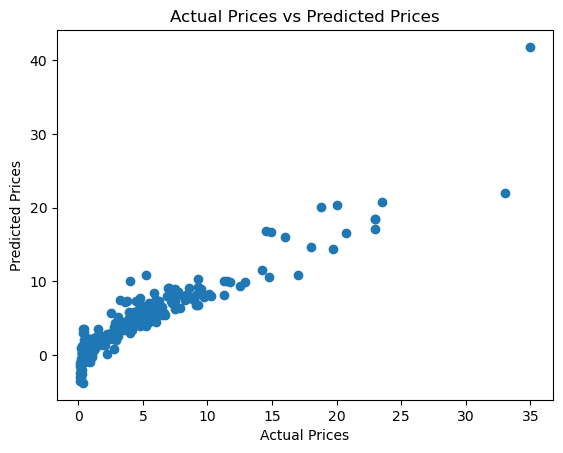

In [41]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices") # This is y_train
plt.ylabel("Predicted Prices") 
plt.title("Actual Prices vs Predicted Prices - Linear")
plt.show()

# Generally close to each other so the values predicted are close to the actual price

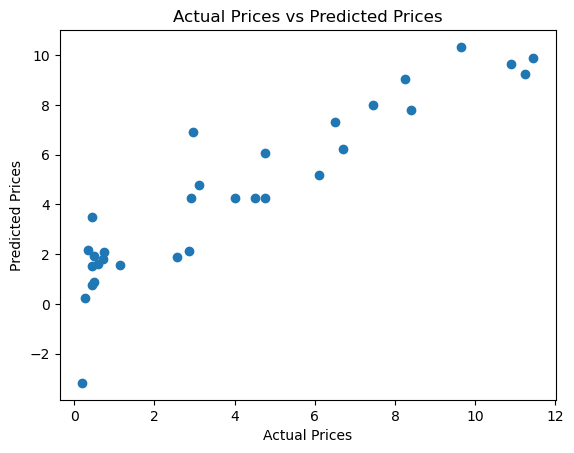

In [44]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices") # This is y_train
plt.ylabel("Predicted Prices") 
plt.title("Actual Prices vs Predicted Prices - Linear")
plt.show()

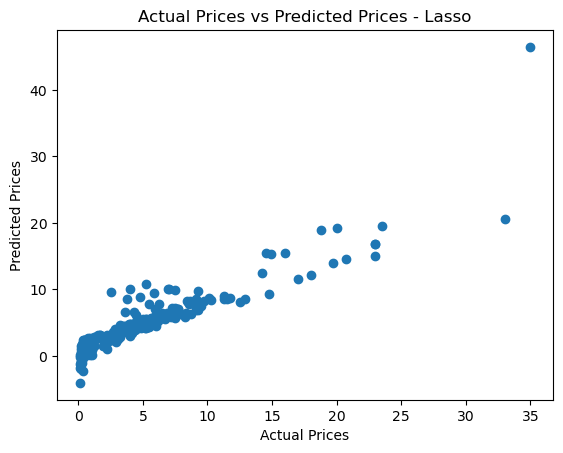

In [48]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices") 
plt.title("Actual Prices vs Predicted Prices - Lasso")
plt.show()

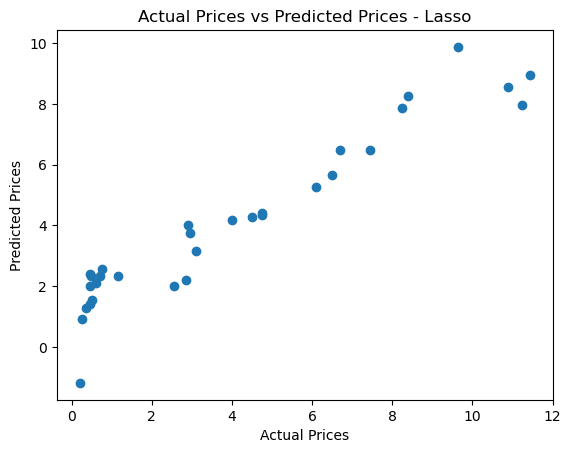

In [49]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices") 
plt.title("Actual Prices vs Predicted Prices - Lasso")
plt.show()